In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, AdaboostRegressor, GradientBoostingRegressor
from sklearn.neighbours import KNeighboursRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

ImportError: cannot import name 'AdaboostRegressor' from 'sklearn.ensemble' (C:\Users\shree\anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
from sklearn.svm import SVR, LinearSVR

In [29]:
train=pd.read_csv('Temparature Forecast_Data.csv')

In [30]:
train.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [28]:
train.shape

(7752, 26)

In [29]:
train.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [30]:
for i in train.columns:
    print(train[i].value_counts())

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64
30062013    25
19072016    25
26072016    25
25072016    25
24072016    25
            ..
10082014    25
09082014    25
08082014    25
07082014    25
nan          2
Name: Date, Length: 311, dtype: int64
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64
19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
            ..
52.924568    1
60.21519

In [35]:
# Creating DateTime Objects and extracting date , month and Year

train['Date']=pd.to_datetime(train['Date'])
                                   

In [36]:
train['Date_day']= train['Date'].apply(lambda x:x.day)
train['Date_month']= train['Date'].apply(lambda x:x.month)
train['Date_year']= train['Date'].apply(lambda x:x.year)

In [21]:
train['Date']=train['Date'].apply(lambda x: str(x).replace('-', '').split()[0])

In [24]:
train['date']= train['Date'].apply(lambda x: np.NAN if x =='NaT'else x)

<AxesSubplot:>

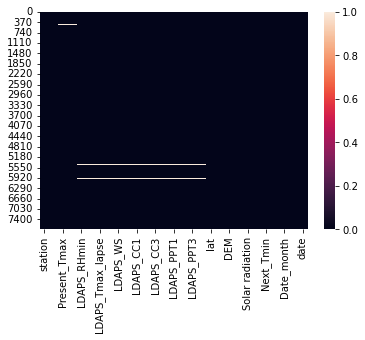

In [37]:
sns.heatmap(train.isnull())

In [38]:
(train.isnull()).sum(axis=0)

station              2
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Date_day             2
Date_month           2
Date_year            2
date                 2
dtype: int64

# EDA

In [31]:
train.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
catogarical_col=['lat', 'lon','Date','station','DEM','Slope','Date_day','Date_month', 'Date_year']

In [32]:
columns = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation']

target = ['Next_Tmax', 'Next_Tmin']

# Visualizing Target Variabless

In [45]:
plt.style.use('seaborn-darkgrid')

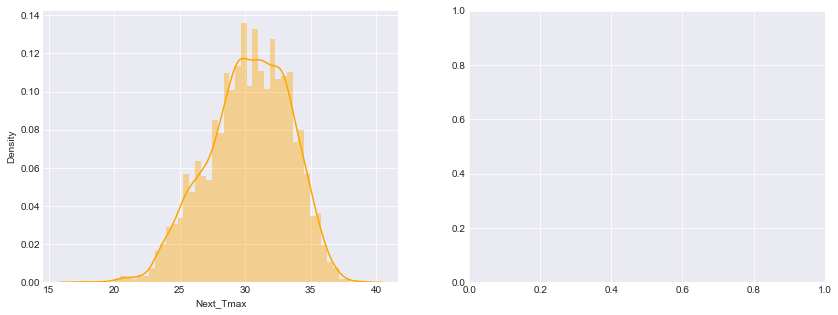

In [51]:
fig,ax=plt.subplots(1,2, figsize=(14,5))

sns.distplot(train['Next_Tmax'], ax=ax[0],color='orange')


fig.show()

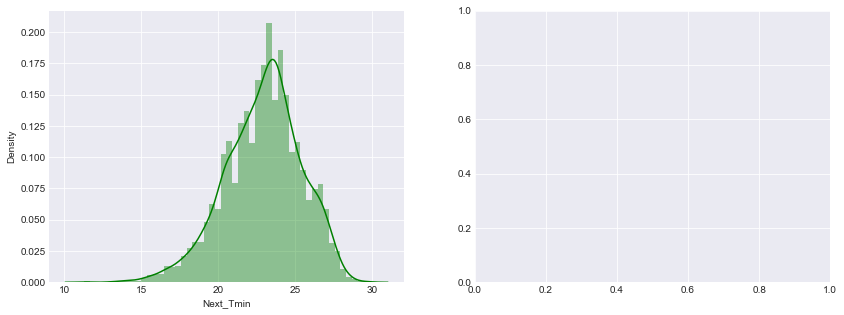

In [54]:
fig,ax=plt.subplots(1,2, figsize=(14,5))
sns.distplot(train['Next_Tmin'], ax=ax[0],color='green')
fig.show()

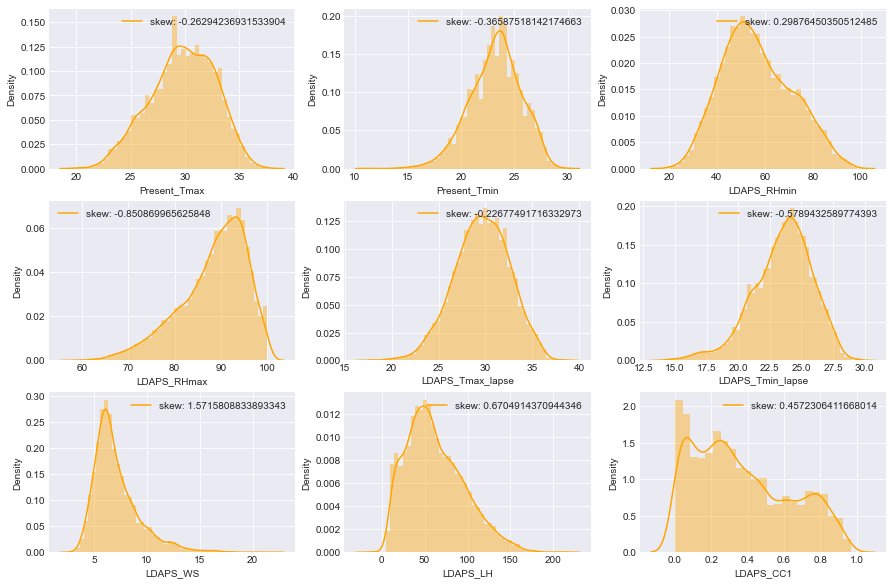

In [56]:
plt.figure(figsize=(15,10))
k=1
for i in columns[:9]:
    plt.subplot(3,3,k)
    
    sns.distplot(train[i],color='orange')
    plt.legend(['skew: '+str(train[i].skew())])
    k=k+1            

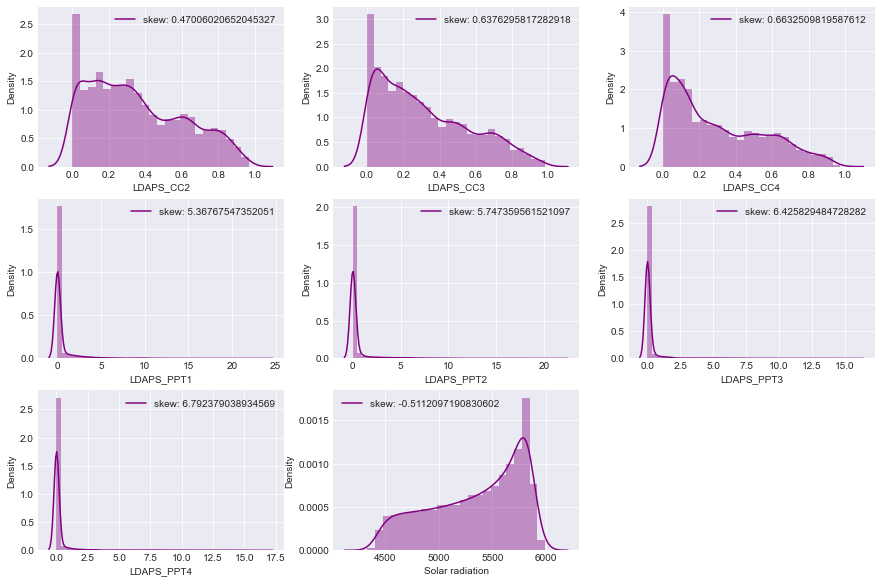

In [57]:
plt.figure(figsize=(15,10))
k=1
for i in columns[9:]:
    plt.subplot(3,3,k)
    
    sns.distplot(train[i],color='purple')
    plt.legend(['skew: '+str(train[i].skew())])
    k=k+1 

<AxesSubplot:xlabel='Date', ylabel='Density'>

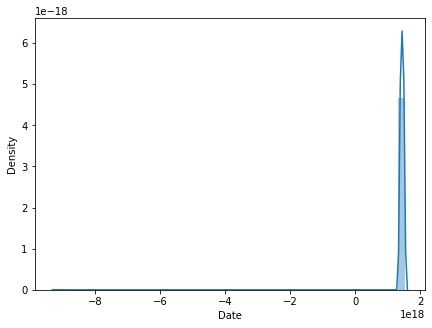

In [37]:
plt.figure(figsize=(7,5))
sns.distplot(train ['Date'])

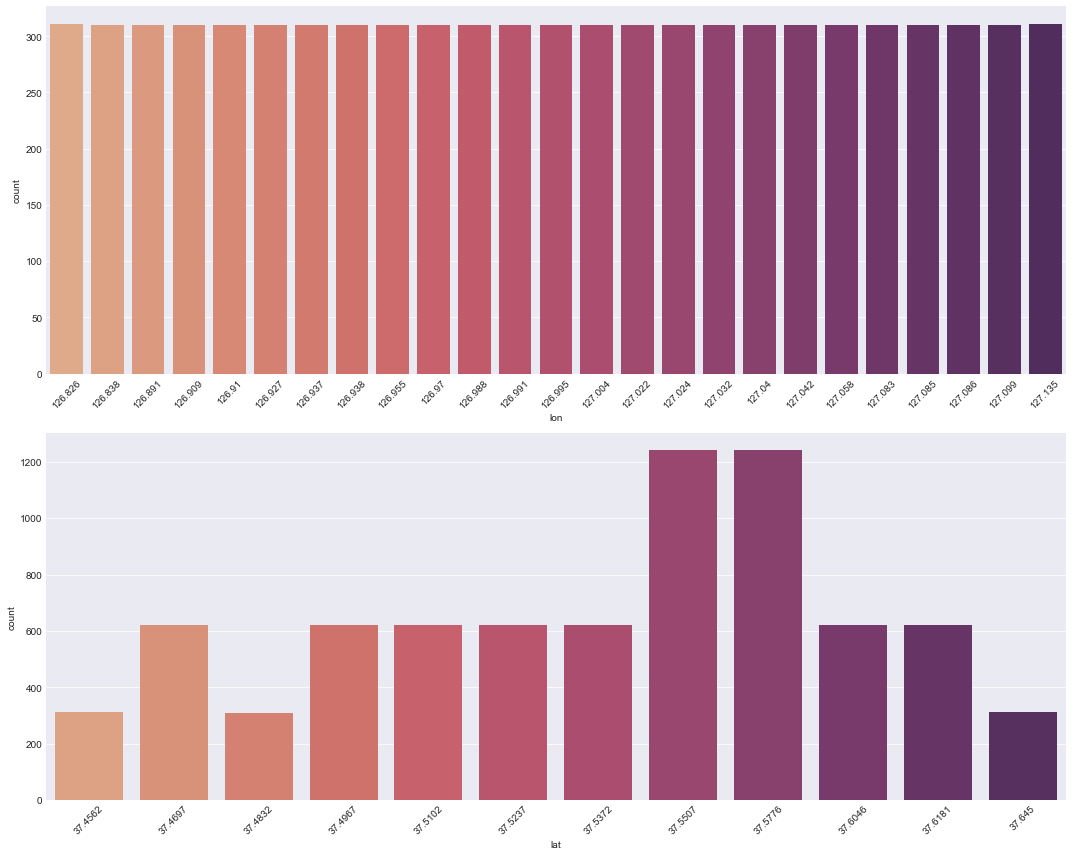

In [60]:
plt.figure(figsize=(15,12))
c=1
for i in ['lon','lat']:
    
    plt.subplot(2,1,c)
    c=c+1
    sns.countplot(train[i],palette='flare')
    plt.xticks(rotation=45)
    plt.tight_layout()

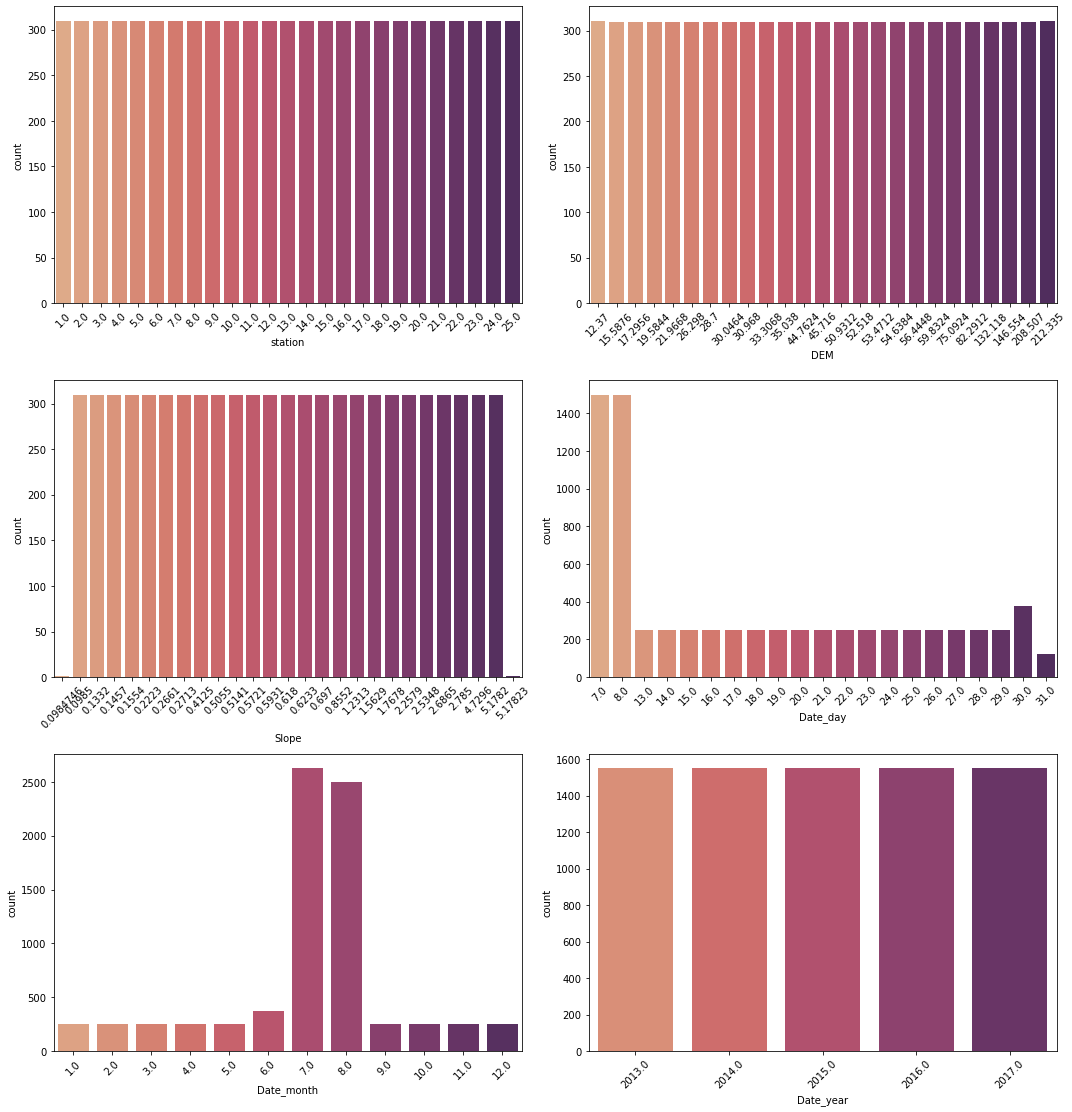

In [38]:
plt.figure(figsize=(15,20))
c=1
for i in catogarical_col[3:]:
    
    plt.subplot(4,2,c)
    c=c+1
    sns.countplot(train[i],palette='flare')
    plt.xticks(rotation=45)
    plt.tight_layout()

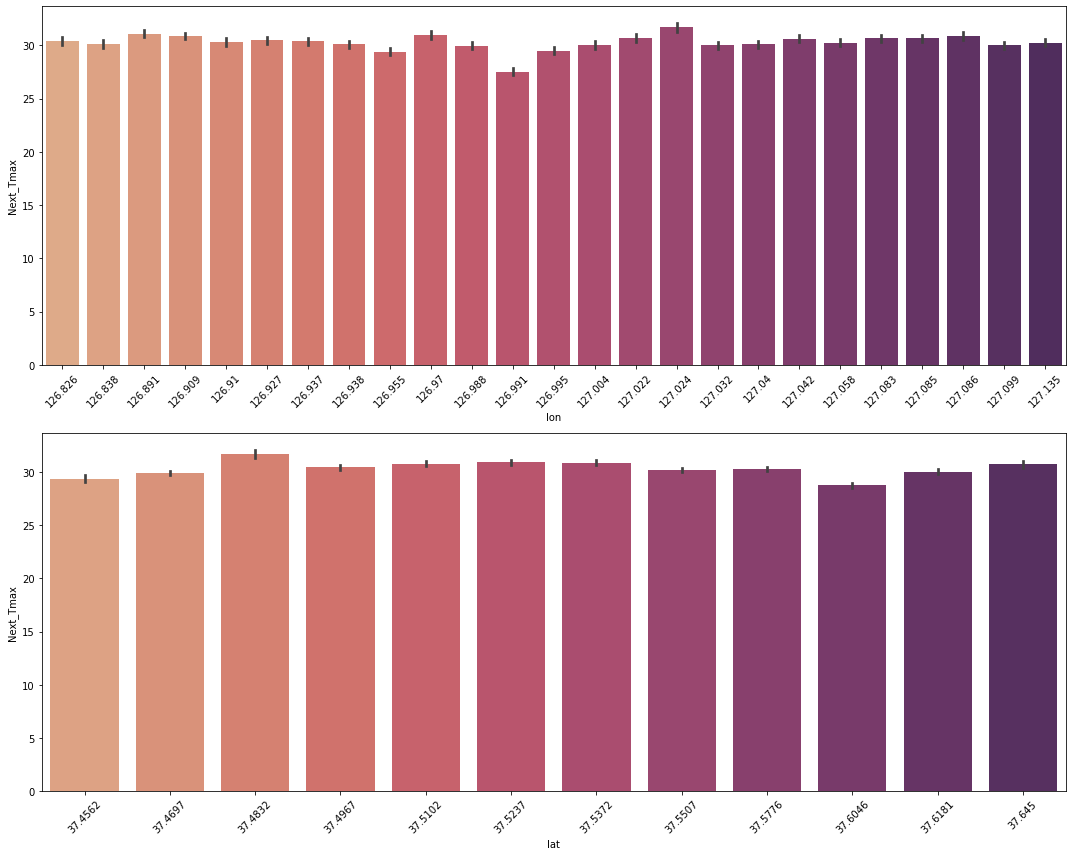

In [41]:
plt.figure(figsize=(15,12))
c=1
for i in ['lon','lat']:
    
    plt.subplot(2,1,c)
    c=c+1
    sns.barplot(train[i],train['Next_Tmax'], palette='flare')
    plt.xticks(rotation=45)
    plt.tight_layout()

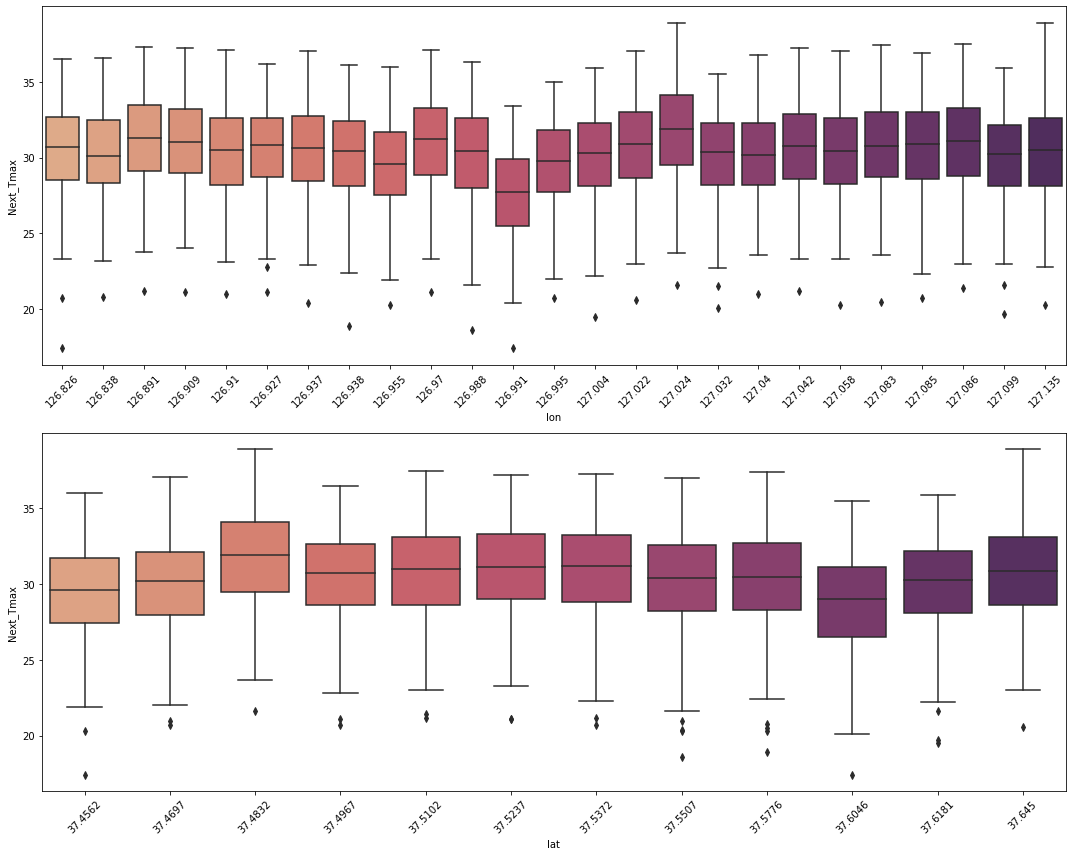

In [43]:
plt.figure(figsize=(15,12))
c=1
for i in ['lon','lat']:
    
    plt.subplot(2,1,c)
    c=c+1
    sns.boxplot(train[i],train['Next_Tmax'], palette='flare')
    plt.xticks(rotation=45)
    plt.tight_layout()

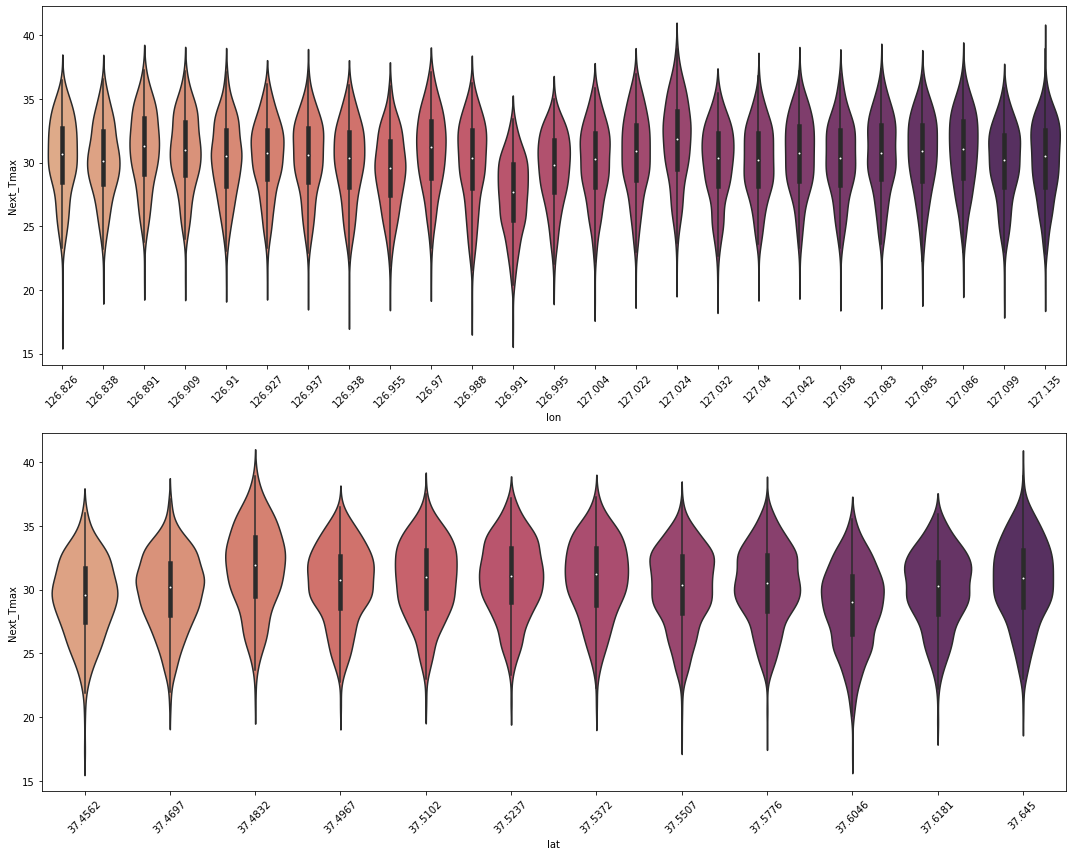

In [44]:
plt.figure(figsize=(15,12))
c=1
for i in ['lon','lat']:
    
    plt.subplot(2,1,c)
    c=c+1
    sns.violinplot(train[i],train['Next_Tmax'], palette='flare')
    plt.xticks(rotation=45)
    plt.tight_layout()

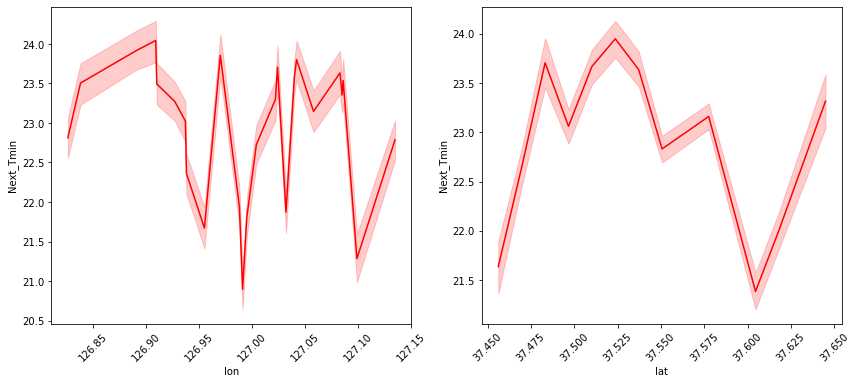

In [46]:
plt.figure(figsize=(12,10))
c=1
for i in ['lon','lat']:
    for j in['Next_Tmax','Next_Tmin']:
    
     plt.subplot(2,2,c)
    c=c+1
    sns.lineplot(train[i],train[j], color='red')
    plt.xticks(rotation=45)
    plt.tight_layout()

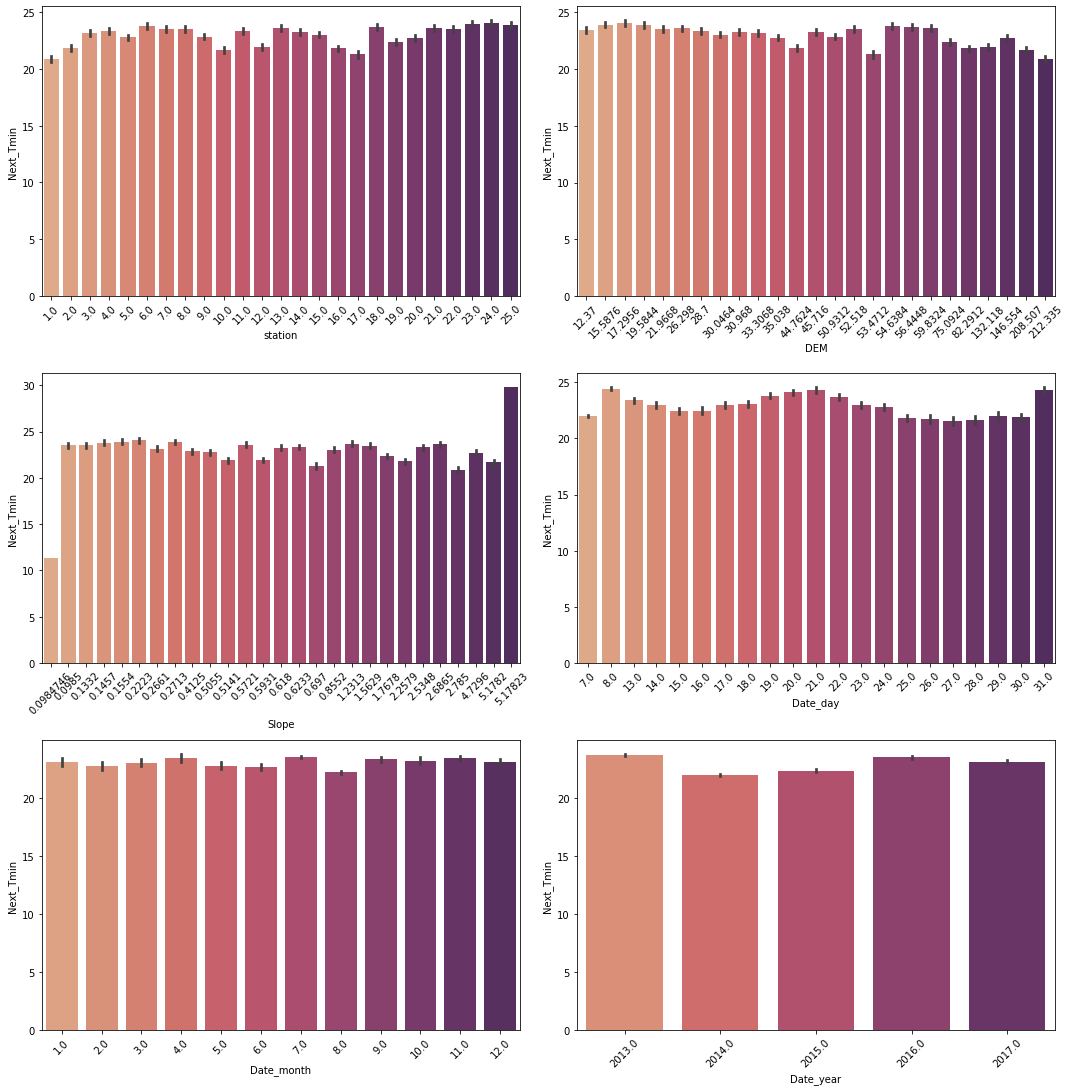

In [48]:
plt.figure(figsize=(15,40))
c=1
for i in catogarical_col[3:]:
    for j in['Next_Tmax','Next_Tmin']:
    
     plt.subplot(8,2,c)
    c=c+1
    sns.barplot(train[i],train[j], palette='flare')
    plt.xticks(rotation=45)
plt.tight_layout()

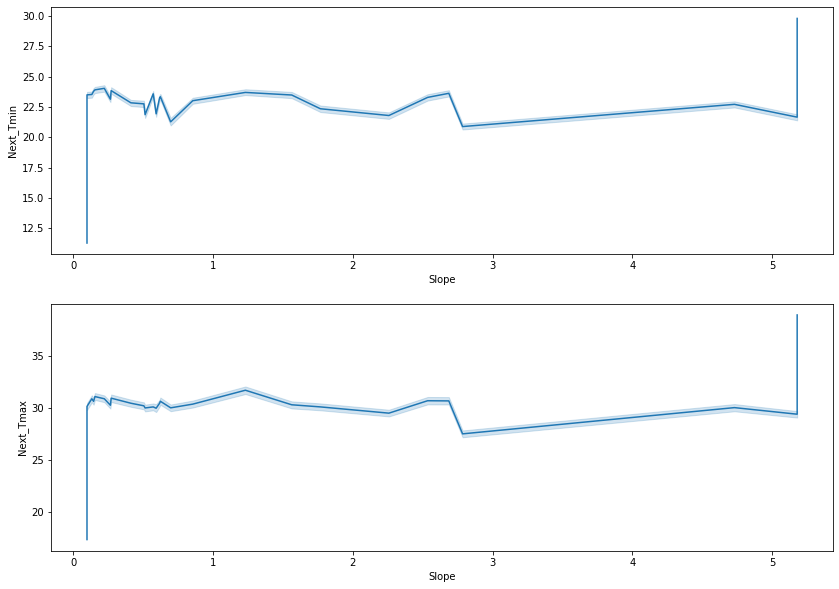

In [50]:
fig,ax=plt.subplots(2,1, figsize=(14,10))

sns.lineplot(train['Slope'],train['Next_Tmax'], ax=ax[1],palette='Set2')
sns.lineplot(train['Slope'],train['Next_Tmin'], ax=ax[0],palette='Set2')
fig.show()

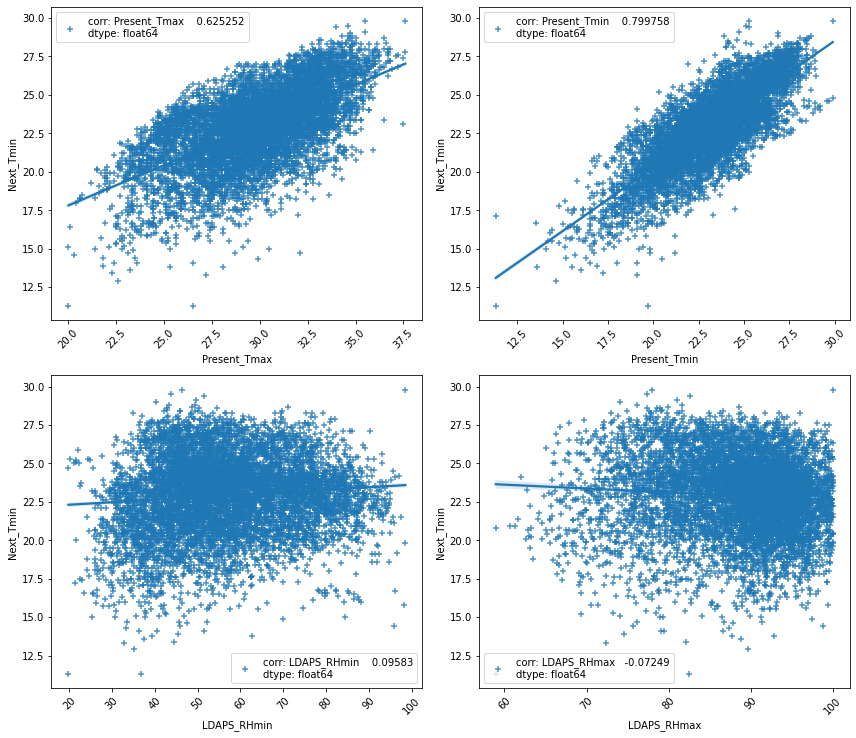

In [55]:
plt.figure(figsize=(12,20))
c=1
for i in columns[:4]:
    for j in['Next_Tmax','Next_Tmin']:
    
     plt.subplot(4,2,c)
    c=c+1
    sns.regplot(x=i,y=j, data=train, marker='+')
    plt.legend( ['corr: '+str(pd.DataFrame(train[i]).corrwith(train[j]))])
    plt.xticks(rotation=45)
plt.tight_layout()

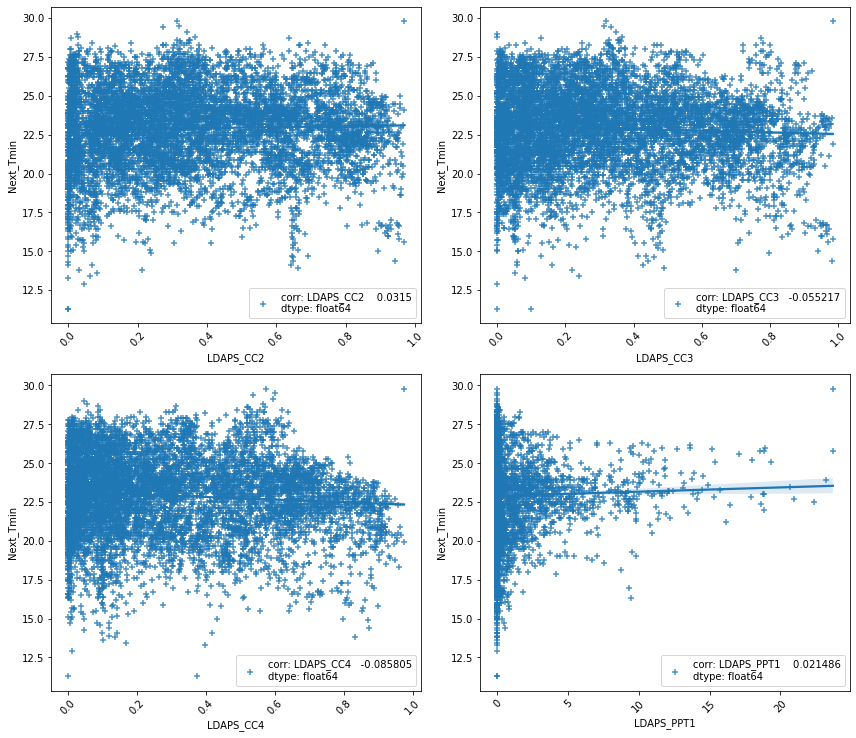

In [56]:
plt.figure(figsize=(12,20))
c=1
for i in columns[9:13]:
    for j in['Next_Tmax','Next_Tmin']:
    
     plt.subplot(4,2,c)
    c=c+1
    sns.regplot(x=i,y=j, data=train, marker='+')
    plt.legend( ['corr: '+str(pd.DataFrame(train[i]).corrwith(train[j]))])
    plt.xticks(rotation=45)
plt.tight_layout()

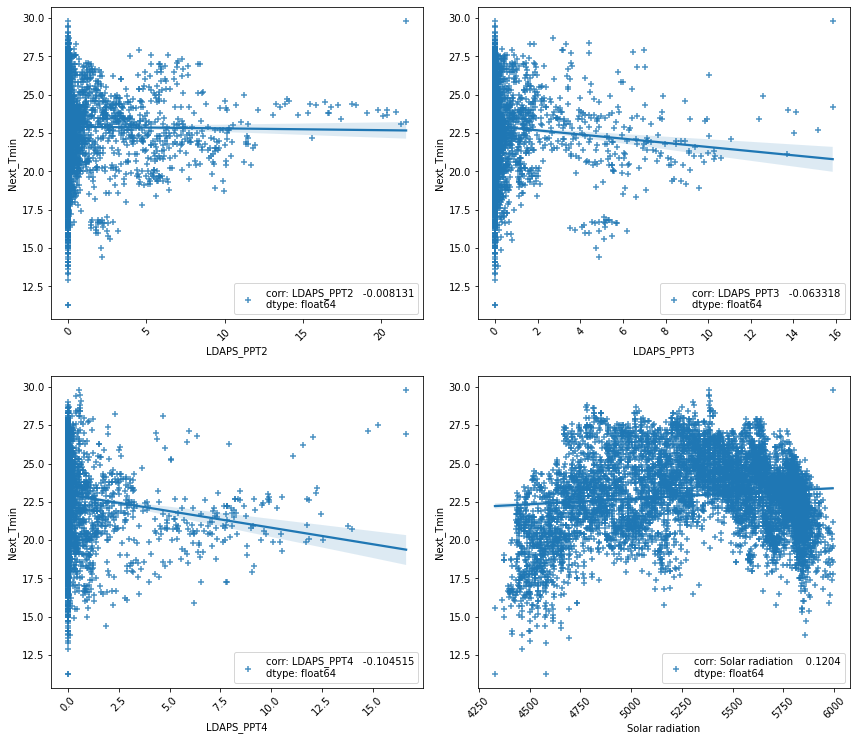

In [57]:
plt.figure(figsize=(12,20))
c=1
for i in columns[13:]:
    for j in['Next_Tmax','Next_Tmin']:
    
     plt.subplot(4,2,c)
    c=c+1
    sns.regplot(x=i,y=j, data=train, marker='+')
    plt.legend( ['corr: '+str(pd.DataFrame(train[i]).corrwith(train[j]))])
    plt.xticks(rotation=45)
plt.tight_layout()

<AxesSubplot:>

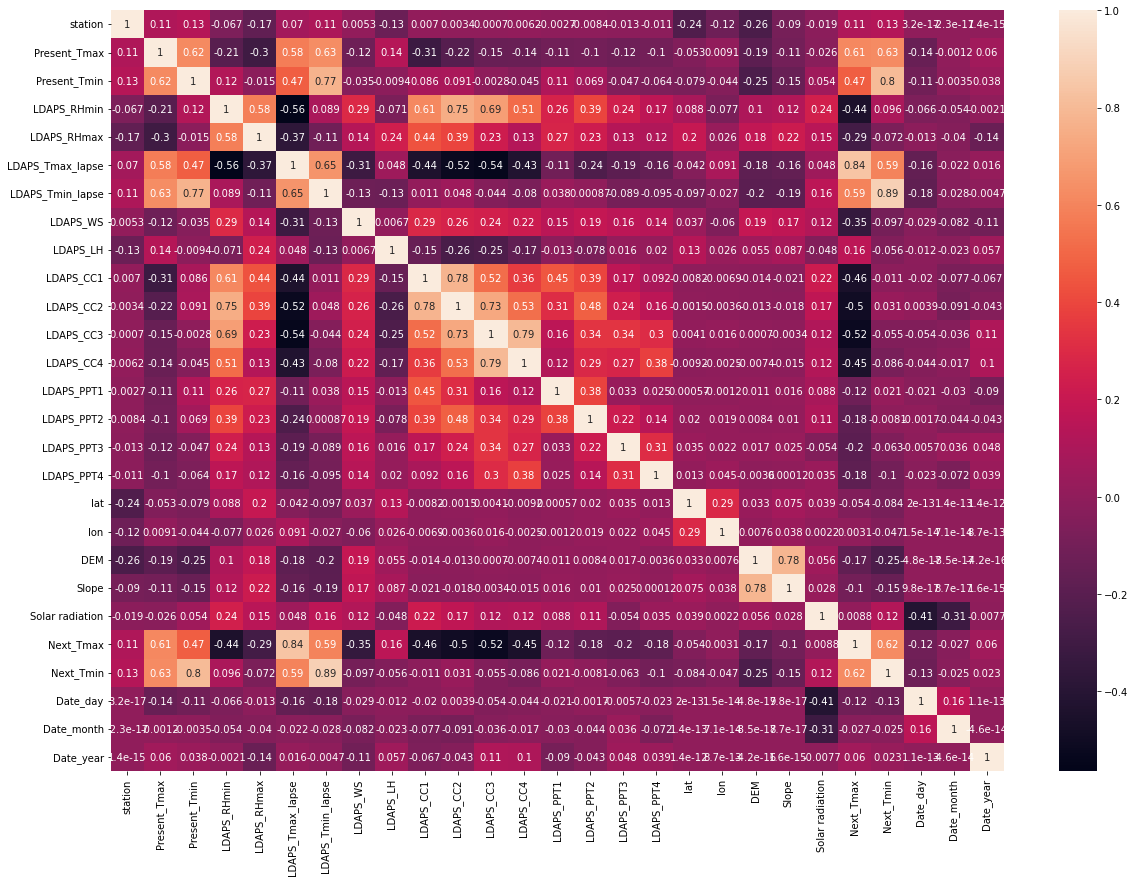

In [58]:
plt.figure(figsize= (20,14))
sns.heatmap(train.corr(),annot=True)

In [61]:
train['LDAPS_CC1']

0       0.233947
1       0.225508
2       0.209344
3       0.216372
4       0.151407
          ...   
7747    0.030034
7748    0.035874
7749    0.048954
7750    0.000000
7751    0.967277
Name: LDAPS_CC1, Length: 7752, dtype: float64

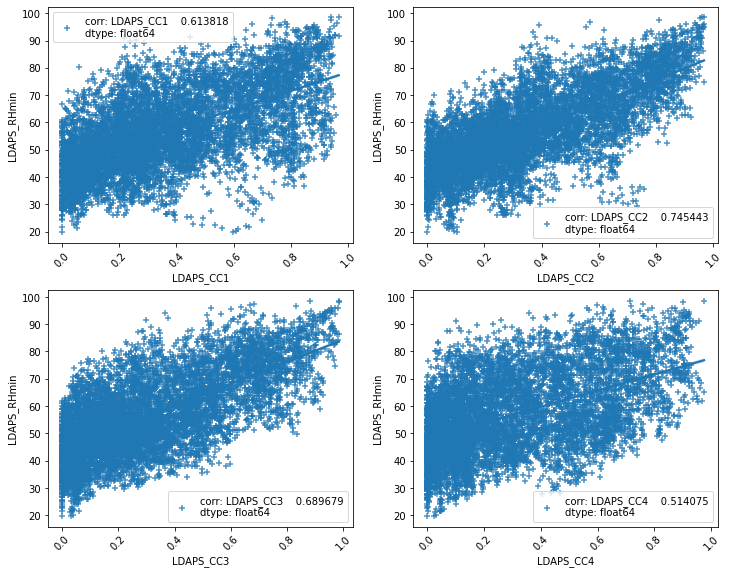

In [64]:
plt.figure(figsize=(12,20))
c=1
for i in ['LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4']:
    
    plt.subplot(4,2,c)
    c=c+1
    sns.regplot(x=i,y='LDAPS_RHmin', data=train, marker='+')
    plt.legend( ['corr: '+str(pd.DataFrame(train[i]).corrwith(train['LDAPS_RHmin']))])
    plt.xticks(rotation=45)

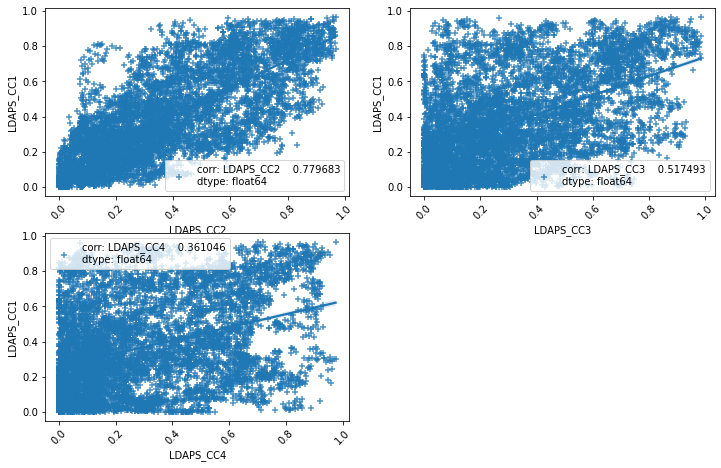

In [65]:
plt.figure(figsize=(12,20))
c=1
for i in [ 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4']:
    
    plt.subplot(5,2,c)
    c=c+1
    sns.regplot(x=i,y='LDAPS_CC1', data=train, marker='+')
    plt.legend( ['corr: '+str(pd.DataFrame(train[i]).corrwith(train['LDAPS_CC1']))])
    plt.xticks(rotation=45)

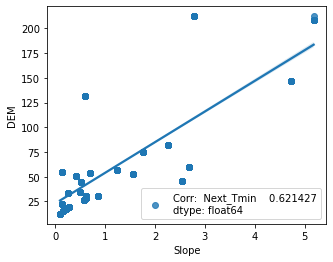

In [15]:
plt.figure(figsize=(5,4))
sns.regplot(train['Slope'],train['DEM'])
plt.legend( ['Corr:  '+str(pd.DataFrame(train['Next_Tmin']).corrwith(train['Next_Tmax']) )] )

<AxesSubplot:xlabel='Next_Tmax', ylabel='Next_Tmin'>

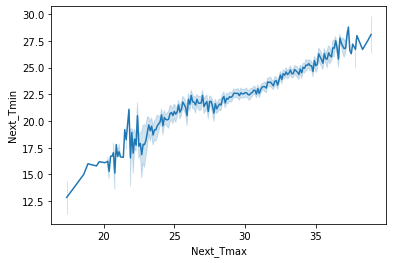

In [16]:
sns.lineplot(train['Next_Tmax'],train['Next_Tmin'])

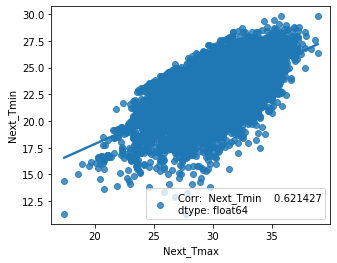

In [17]:
plt.figure(figsize = (5,4))
sns.regplot(train['Next_Tmax'],train['Next_Tmin'])
plt.legend( ['Corr:  '+str(pd.DataFrame(train['Next_Tmin']).corrwith(train['Next_Tmax']) )] )

In [19]:
train[train.isna().any(axis=1)][:20]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
225,1.0,09-07-2013,NaN,NaN,70.051193,99.668961,27.872808,22.907420,11.017837,44.002020,...,0.036680,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5925.883789,23.4,22.0
271,22.0,10-07-2013,NaN,NaN,72.196007,95.168205,28.097980,24.510159,8.374849,38.782242,...,0.007261,0.000000,0.000000,37.5102,127.086,21.9668,0.1332,5772.487305,26.1,24.1
300,1.0,12-07-2013,NaN,NaN,95.027298,99.209839,24.078120,21.866817,8.543768,9.371270,...,5.055660,1.347418,0.980052,37.6046,126.991,212.3350,2.7850,5893.265625,23.2,20.5
450,1.0,18-07-2013,NaN,NaN,60.891193,94.747780,29.195536,23.236973,10.881031,79.349271,...,0.000000,0.000000,0.057358,37.6046,126.991,212.3350,2.7850,5812.293457,27.6,21.8
464,15.0,18-07-2013,NaN,NaN,52.795406,83.902847,31.480089,25.607262,8.995135,26.022306,...,0.000000,0.000000,0.008702,37.5507,126.937,30.0464,0.8552,5681.875000,30.7,23.4
627,3.0,25-07-2013,NaN,NaN,43.809799,86.972778,32.293370,24.725570,6.998412,12.913524,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.2661,5553.048828,31.3,23.3
831,7.0,02-08-2013,29.6,25.8,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5357.705566,NaN,NaN
856,7.0,03-08-2013,NaN,NaN,69.476059,93.672600,30.491629,25.081388,6.282423,124.191446,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5332.515625,NaN,NaN
881,7.0,04-08-2013,NaN,NaN,75.457825,92.582436,30.168241,26.228888,6.921643,99.902727,...,0.000000,0.038057,0.000000,37.5776,126.838,12.3700,0.0985,5306.734863,30.7,25.8
913,14.0,05-08-2013,NaN,NaN,76.040504,94.029243,30.563506,26.743236,7.776664,32.352678,...,0.373245,0.059894,0.000000,37.4967,126.927,30.9680,0.6180,5287.500977,28.8,22.2


In [20]:
len(train[train.isna().any(axis=1)])

164

In [25]:
train.drop('Date',axis=1,inplace=True)

KeyError: "['Date'] not found in axis"

In [26]:
train=train.dropna()

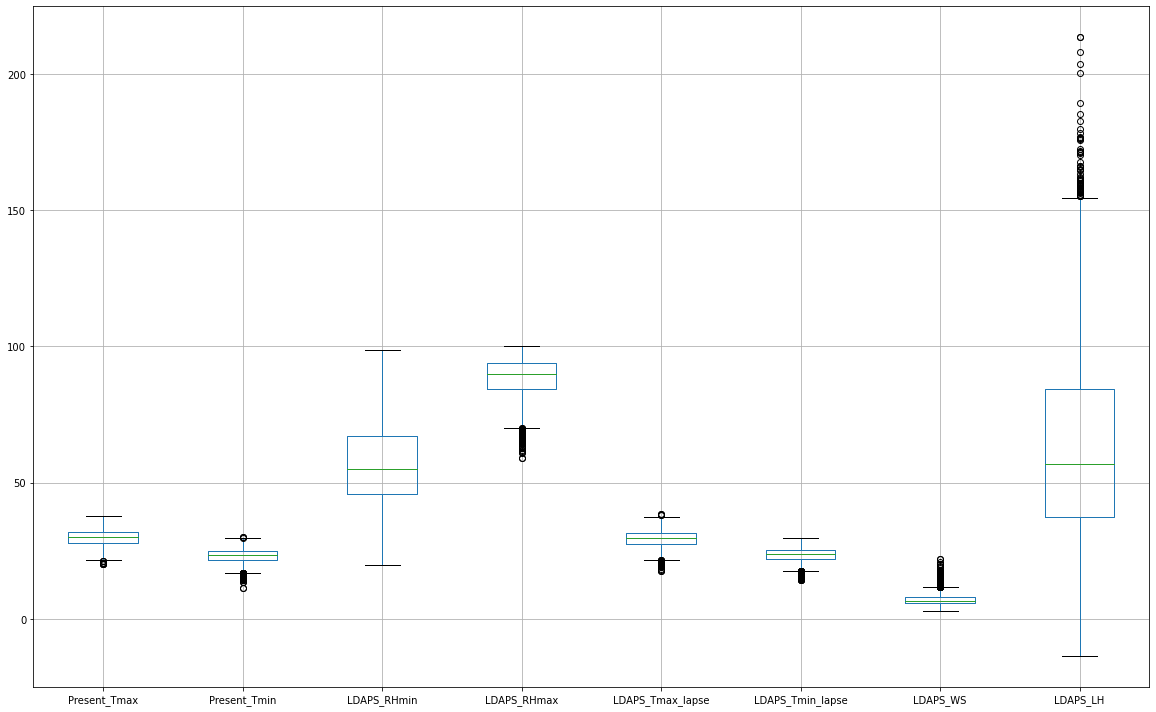

In [33]:
train[columns].iloc[:,:8].boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

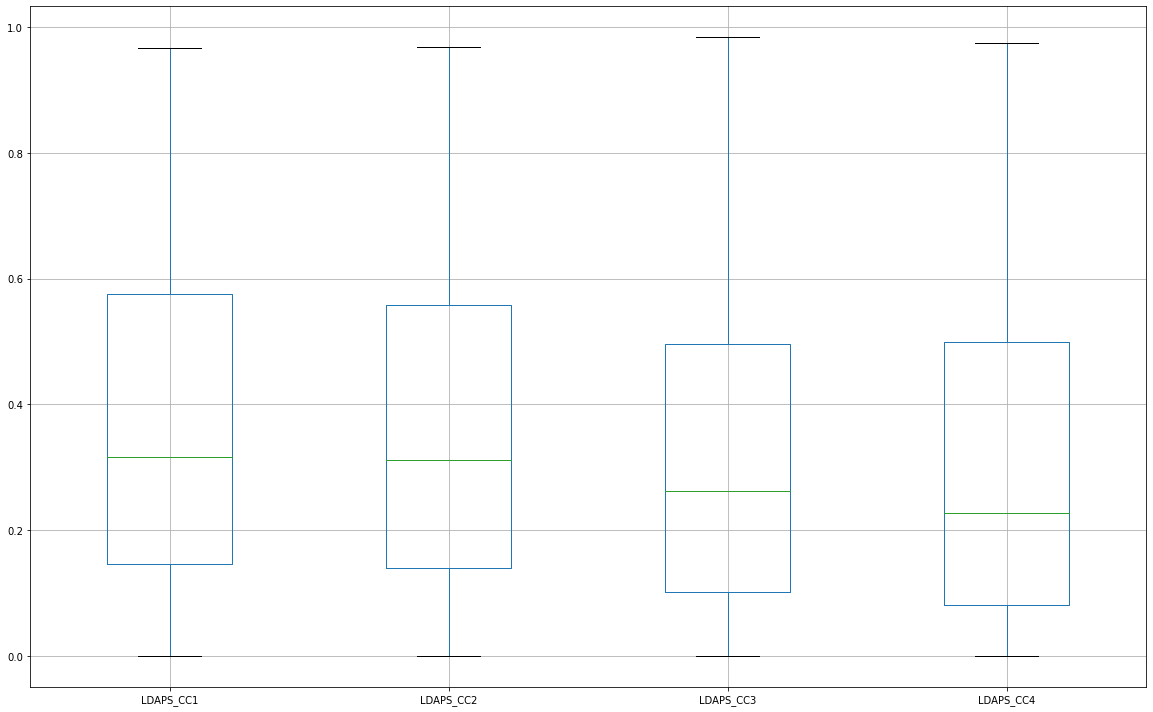

In [34]:
train[columns].iloc[:,8:12].boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

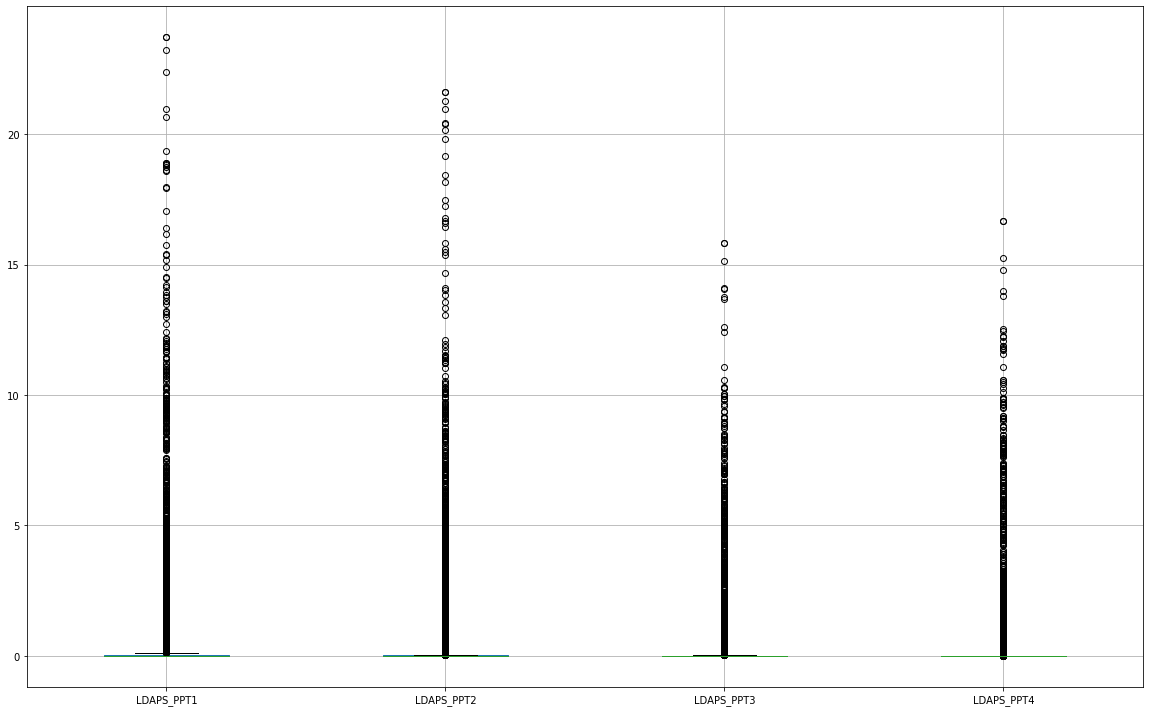

In [35]:
train[columns].iloc[:,12:-1].boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

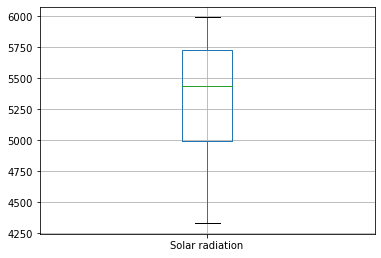

In [36]:
train[columns].iloc[:,-1:].boxplot(figsize=[6,5])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [37]:
from scipy.stats import zscore

In [40]:
train.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


In [45]:
from sklearn.preprocessing import PowerTransformer

In [47]:
transformer=PowerTransformer()

In [66]:
y_max=train['Next_Tmax']
y_min=train['Next_Tmin']
X_max =train.drop('Next_Tmax',axis=1)
X_min =train.drop('Next_Tmin',axis=1)
x=train.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=train[['Next_Tmax','Next_Tmin']]

In [56]:
from sklearn.decomposition import PCA

In [58]:
def random_state_func(model,x,y):
    randomstate=0
    max_score=0
    
    for i in range(1,50):
        x_train,x_test,y_train,y_test=Train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,y_pred)
        if(score>max_socre):
            max_score=score
            randomstate= i
            
            return(randomstate,max_score)
        
    

In [59]:
cv_scores=[]
r2_scores=[]
ramse=[]

In [63]:
def model_predict(model,randomstate,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=randomstate)
    model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    cv_score=np.means(cross_val_score(model,x,y,cv=10,scoreing='r2'))
    
    print('---------------',model,'---------------')
    print('r2 Score   ; ', r2_score(y_test,predictions))
    print('Cross validation score:    ', cv_score)
    print('Root Mean Square Error:    ', np.sqrt(mean_squared_error(y_test,predictions)))
    print('Absolute mean Square:    ',mean_absolute_error(y_test,predictions))
        
    
    plt.figure(figsize=(6,5))
    
    sns.regplot(y_test,preditcitons,color='orange')
    plt.xlabel('Y_true')
    plt.ylabel('Y_predicted')
    plt.show()

In [65]:
rs,score=random_state_func(LinearRegression(),x_max1,y_max)
print('Random State : ', rs, 'with r2 score: ',score)
rs1,score1=random_state_func(LinearRegression(),x_min1,y_min)
print('Random State:  ',rs1, 'with r2 score : ', score1)

NameError: name 'x_max1' is not defined